## Step - 1: Reading and Understanding the Data

In [1]:
# Importing all libraries and dependencies for dataframe
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Reading the Customer Attrition using Logistic Regression on Bank Dataset on which analysis needs to be done
df = pd.read_csv('banknotes.csv')

df.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [3]:
# Columns of the data set
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [4]:
# shape of the data
df.shape

(1372, 5)

In [5]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [6]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Step - 2: Cleaning the Data

In [7]:
# Calculating the Missing Values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

24

There are some duplicate rows. So, we will remove them(i.e. the duplicate rows) from our dataset. 

In [9]:
# Dumplicate rows in the data set
df[df.duplicated()]

,variance,skewness,curtosis,entropy,class
259,0.9297,-3.7971,4.6429,-0.2957,0
275,-0.7869,9.5663,-3.7867,-7.5034,0
388,-0.2062,9.2207,-3.7044,-6.8103,0
627,-0.2062,9.2207,-3.7044,-6.8103,0
750,0.5195,-3.2633,3.0895,-0.9849,0
784,-2.6479,10.1374,-1.3310,-5.4707,0
801,0.5195,-3.2633,3.0895,-0.9849,0
895,0.5195,-3.2633,3.0895,-0.9849,0
942,0.3292,-4.4552,4.5718,-0.9888,0
948,-1.8584,7.8860,-1.6643,-1.8384,0


In [10]:
# Removing duplicate rows from data set by keeping first row
df.drop_duplicates(inplace=True, keep = 'first')
df.shape

(1348, 5)

## Step - 3: Visualising the Data

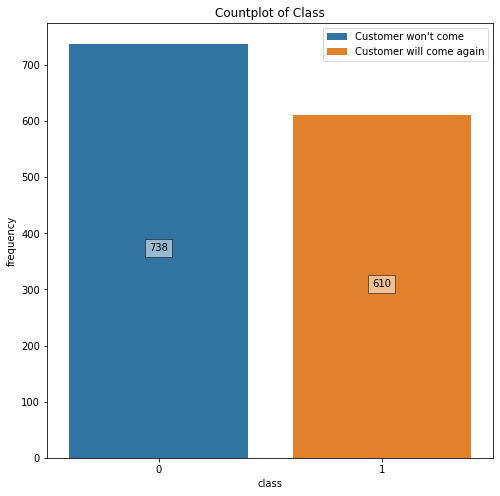

In [11]:
# Visualizing the different classes available

plt.figure(figsize = (8, 8))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 bbox=dict(facecolor = 'white', alpha = .5))
sns.countplot(df['class'], label = ["Customer won't come", 'Customer will come again'])
x = ['High', 'Low']
y = [df.shape[0]-np.sum(df['class']), np.sum(df['class'])]
addlabels(x, y)
plt.title('Countplot of Class')
plt.ylabel('frequency')
plt.legend()
plt.show()

<Figure size 864x864 with 0 Axes>

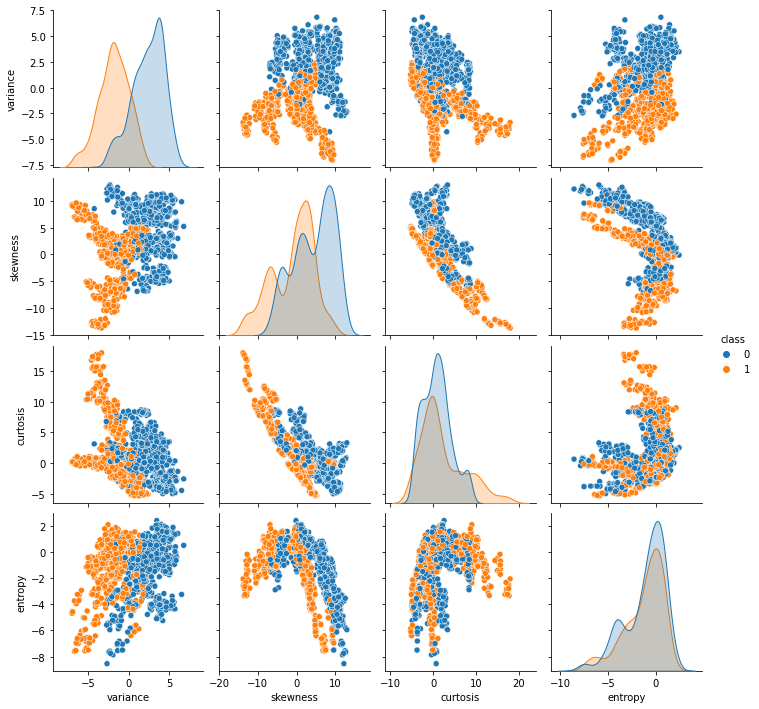

In [12]:
# pair plot of the data set
plt.figure(figsize = (12, 12))
ax = sns.pairplot(df, hue='class')
ax
plt.show()

In [13]:
# printing correlation
correlation_matrix= df.corr()
correlation_matrix

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


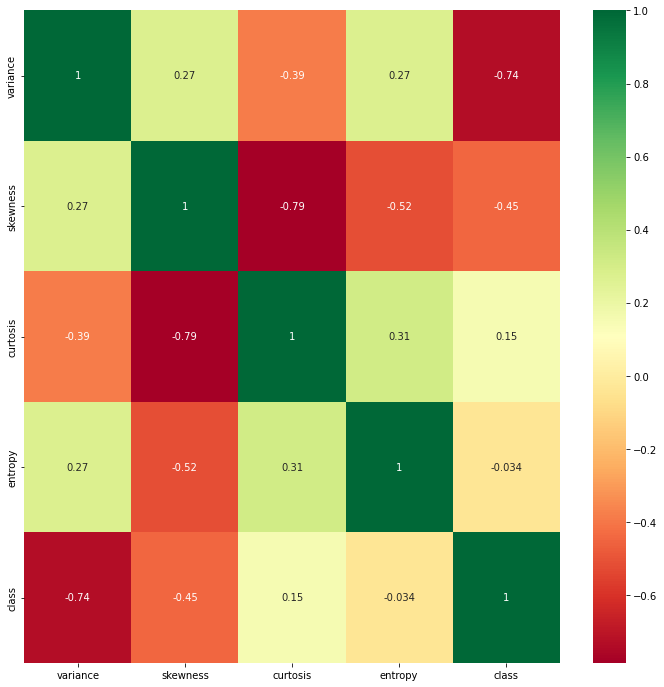

In [14]:
# Heat map of the data set
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, cmap="RdYlGn", annot=True)
plt.show()

#### Insights:
* variance and class are highly negative correlated.
* curtosis and skewness are highly negative correlated.

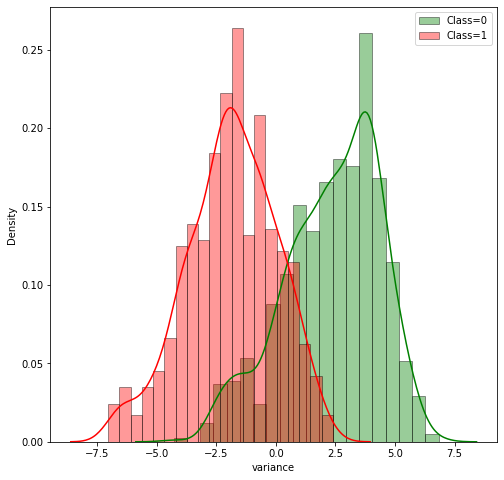

In [15]:
# Visualizing relation between variance and class by density plot 
plt.figure(figsize = (8, 8))
sns.distplot(df[df['class']==0]['variance'],bins=20,hist_kws=dict(edgecolor='black'),color='green',label='Class=0')
sns.distplot(df[df['class']==1]['variance'],bins=20,hist_kws=dict(edgecolor='black'),color='red',label='Class=1')
plt.legend()
plt.show()

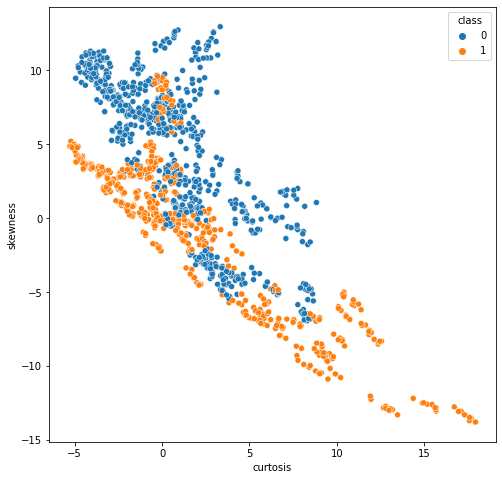

In [16]:
# Visualizing relation between curtosis and skewness by scatter plot
plt.figure(figsize = (8, 8))
sns.scatterplot(x=df['curtosis'], y=df['skewness'], hue=df['class'])
plt.show()

curtosis and skewness are highly negative correlated.

## Step - 4: Splitting the Data into Training and Testing Sets

In [17]:
# extracting features
X=df.drop(['class'],axis=1)

# extracting labels
y=df['class']

In [18]:
# dividing data into training and test sets
# We divide the df into 80/20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20,random_state=0)

In [19]:
X.head()

,variance,skewness,curtosis,entropy
0,-0.89569,3.00250,-3.606700,-3.44570
1,3.47690,-0.15314,2.530000,2.44950
2,3.91020,6.06500,-2.453400,-0.68234
3,0.60731,3.95440,-4.772000,-4.48530
4,2.37180,7.49080,0.015989,-1.74140


In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

### Rescaling the Features
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [21]:
# fature scaling using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Step - 6: Building a LogesticRegression Model

In [22]:
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression()

classifier= log_clf.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [23]:
# Evaluating the algorithmon the test set

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
print(confusion_matrix(y_test, y_pred))

[[144   3]
 [  0 123]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.98      1.00      0.99       123

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



In [26]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9889


In [27]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(random_state=42, n_estimators=500)

In [28]:
# training the random forest classifier
classifier= rf_clf.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
print(confusion_matrix(y_test, y_pred))

[[147   0]
 [  1 122]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.99      1.00       123

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [32]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9963
